# Import important stuff

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy.stats as stats
import seaborn as sns
sns.set_style('whitegrid')  #style list >  'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder()

plt.rcParams['font.family'] = 'DejaVu Sans'

from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import AdaBoostClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier

from numpy import sin, cos, sqrt, arctan2

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Load the data

In [4]:
df = pd.read_csv(r"C:\Users\ASUS\Dataset atau Handson\project 2\fraudTrain.csv")

In [6]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


Check for missing data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Seems like no missing value, lets remove columns that i dont need

In [9]:
unless_column = ['Unnamed: 0', 'unix_time', 'street', 'zip', 'first', 'last', 'cc_num', 'trans_num']

df.drop(unless_column,axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   gender                 1296675 non-null  object 
 5   city                   1296675 non-null  object 
 6   state                  1296675 non-null  object 
 7   lat                    1296675 non-null  float64
 8   long                   1296675 non-null  float64
 9   city_pop               1296675 non-null  int64  
 10  job                    1296675 non-null  object 
 11  dob                    1296675 non-null  object 
 12  merch_lat              1296675 non-null  float64
 13  merch_long             1296675 non-null  float64
 14  is_fraud          

# EDA with Feature Engineering

In [11]:
# changing datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
#change the day of birth into datetime
df['dob'] = pd.to_datetime(df['dob'])

# make date time and transaction time
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

df['transaction_time'] = df['trans_date_trans_time'].dt.time

# make year, month, day, week, and hour feature
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['day_of_week'] = df['trans_date_trans_time'].dt.weekday
df['hour'] = df['trans_date_trans_time'].dt.hour

### Age

In [12]:
#add age variable
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [13]:
#make Age Group

bins = [0, 40, 60, 100]  
labels = ["Young", "Middle", "Elder"]

df["Age Group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4952\433418187.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_AgeGroup_df = df[df['is_fraud'] == 1].groupby('Age Group').size().reset_index(name='fraud_count')


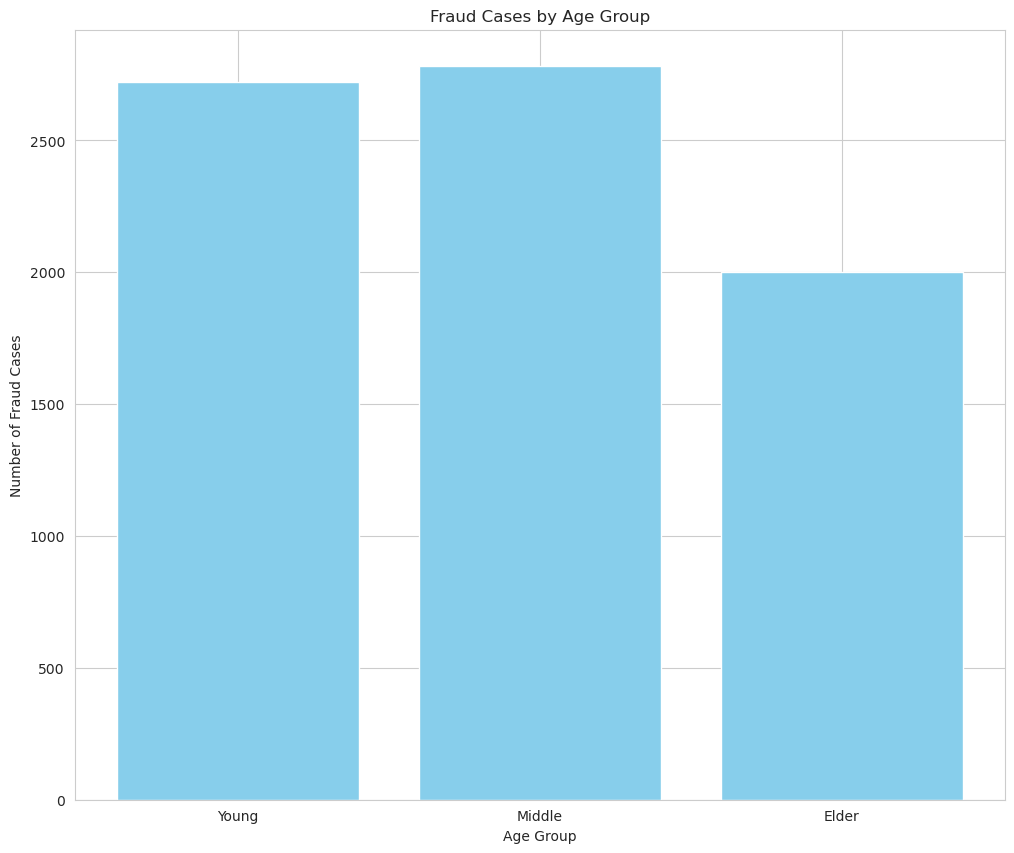

In [26]:
#age group and fraud cases
by_AgeGroup_df = df[df['is_fraud'] == 1].groupby('Age Group').size().reset_index(name='fraud_count')
by_AgeGroup_df

# Plotting age grouped vs fraud
plt.figure(figsize=(12, 10))
plt.bar(by_AgeGroup_df['Age Group'], by_AgeGroup_df['fraud_count'], color='skyblue')

# Labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Age Group')
plt.xticks(range(0, 3))  # Ensures all hours are displayed

plt.show()

In [17]:
#label encoder for maching learning use
le = LabelEncoder()
df["Age Group Encoded"] = le.fit_transform(df["Age Group"])

df = df.drop(['Age Group'], axis=1)

In [19]:
df

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,...,trans_date,trans_time,transaction_time,year,month,day,day_of_week,hour,age,Age Group Encoded
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,...,2019-01-01,00:00:18,00:00:18,2019,1,1,1,0,30,2
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,...,2019-01-01,00:00:44,00:00:44,2019,1,1,1,0,40,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,...,2019-01-01,00:00:51,00:00:51,2019,1,1,1,0,56,1
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,...,2019-01-01,00:01:16,00:01:16,2019,1,1,1,0,52,1
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,...,2019-01-01,00:03:06,00:03:06,2019,1,1,1,0,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,...,2020-06-21,12:12:08,12:12:08,2020,6,21,6,12,58,1
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,...,2020-06-21,12:12:19,12:12:19,2020,6,21,6,12,40,1
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,...,2020-06-21,12:12:32,12:12:32,2020,6,21,6,12,52,1
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,...,2020-06-21,12:13:36,12:13:36,2020,6,21,6,12,39,2


## Fraud cases and days, hours, and weeks

In [22]:
by_hour_df = df[df['is_fraud'] == 1].groupby('hour').size().reset_index(name='fraud_count')

In [24]:
by_day_df = df[df['is_fraud'] == 1].groupby('day').size().reset_index(name='fraud_count')

In [26]:
by_week_df = df[df['is_fraud'] == 1].groupby('day_of_week').size().reset_index(name='fraud_count')

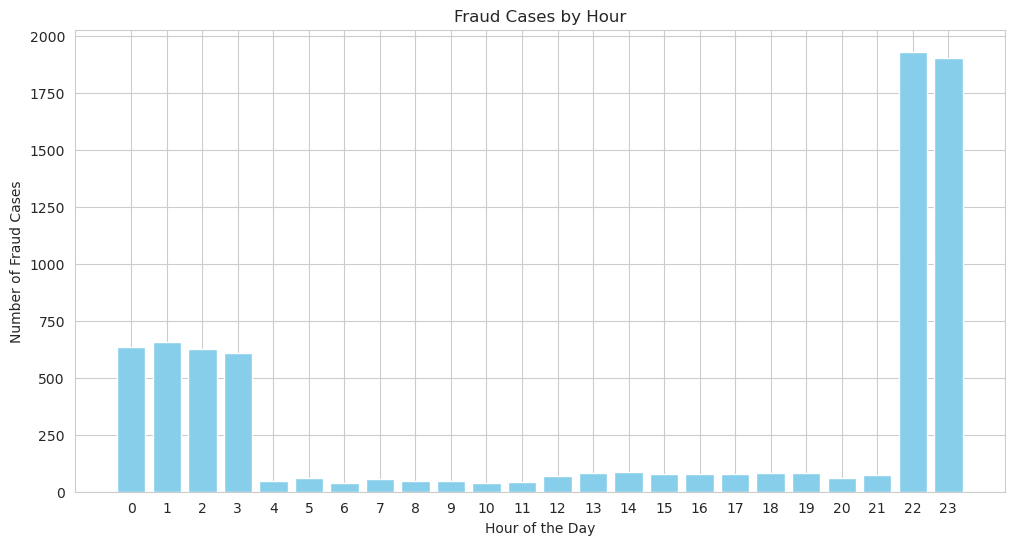

In [88]:
#fraud cases by hour
plt.figure(figsize=(12, 6))
plt.bar(by_hour_df['hour'], by_hour_df['fraud_count'], color='skyblue')

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Hour')
plt.xticks(range(0, 24))  # Ensures all hours are displayed

plt.show()

#perlunya diurut

found significant amount of fraud cases on midnight

In [28]:
# Define risk hours (midnight to 6 AM)
df['risk_hour_flag'] = df['hour'].apply(lambda x: 1 if (x < 6 or x >= 22) else 0)

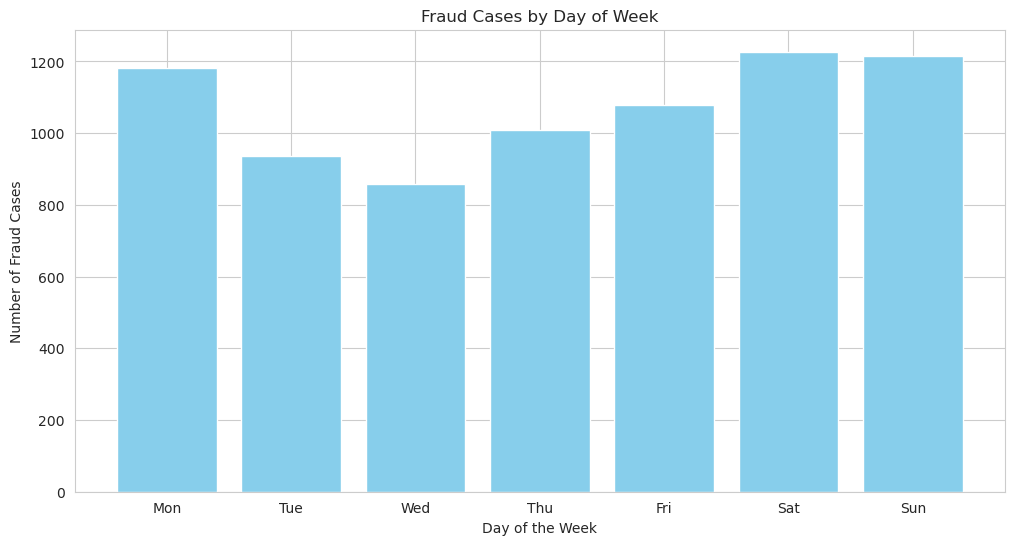

In [73]:
# fraud cases by day of week
plt.figure(figsize=(12, 6))
plt.bar(by_week_df['day_of_week'], by_week_df['fraud_count'], color='skyblue')

# Labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by Day of Week')

# Fix xticks (0-6 if it's a day of the week)
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  

plt.show()

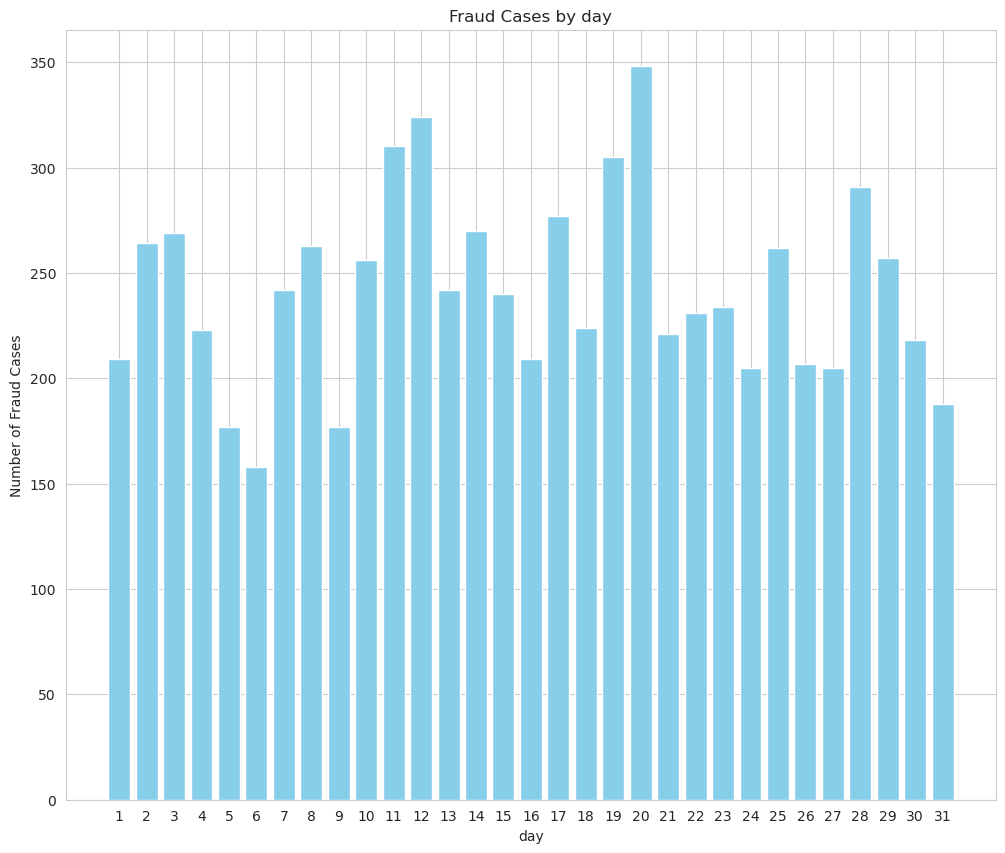

In [51]:
#fraud cases Day of the month
plt.figure(figsize=(12, 10))
plt.bar(by_day_df['day'], by_day_df['fraud_count'], color='skyblue')

# Labels and title
plt.xlabel('day')
plt.ylabel('Number of Fraud Cases')
plt.title('Fraud Cases by day')
plt.xticks(range(1, 32))  # Ensures all hours are displayed

plt.show()

Day of the month cant find fraud pattern

## Check Distance between card holder and merchant

In [30]:
# Convert degrees to radians (vectorized for speed)
df[['lat_rad', 'long_rad', 'merch_lat_rad', 'merch_long_rad']] = np.radians(df[['lat', 'long', 'merch_lat', 'merch_long']])

In [32]:
#calculate distance from user to merchant based on haversine method
def haversine_vectorized(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2.0)**2 + cos(lat1) * cos(lat2) * sin(dlon/2.0)**2
    c = 2 * arctan2(sqrt(a), sqrt(1 - a))
    return R * c

# Compute distance (vectorized)
df['distance_from_user'] = haversine_vectorized(df['lat_rad'], df['long_rad'], df['merch_lat_rad'], df['merch_long_rad'])

In [34]:
# Shift previous transaction coordinates
df[['prev_lat', 'prev_long']] = df.groupby(['lat_rad', 'long_rad'])[['lat_rad', 'long_rad']].shift(1)

# Compute distance only when previous transaction exists
df['distance_from_last_trans'] = np.where(
    df['prev_lat'].notnull(),
    haversine_vectorized(df['lat_rad'], df['long_rad'], df['prev_lat'], df['prev_long']),
    0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29100\3223401360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='distance_from_user', data=df, showfliers=False, palette="muted")


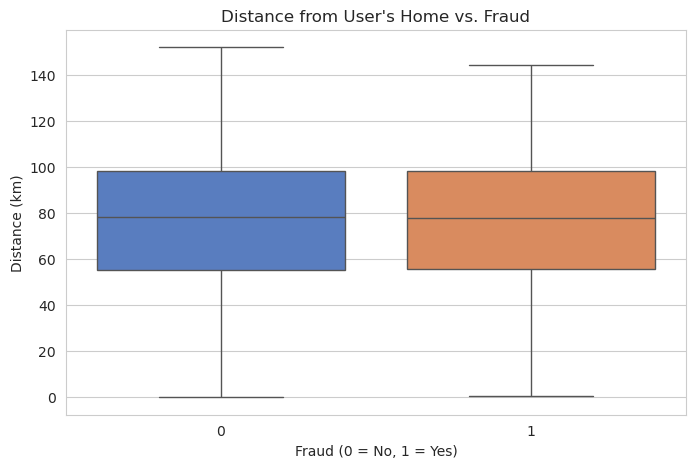

In [36]:
#plot comparison based on distance
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', y='distance_from_user', data=df, showfliers=False, palette="muted")
plt.title("Distance from User's Home vs. Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Distance (km)")
plt.show()

## Based on Amount of Money

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25368\1970369233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


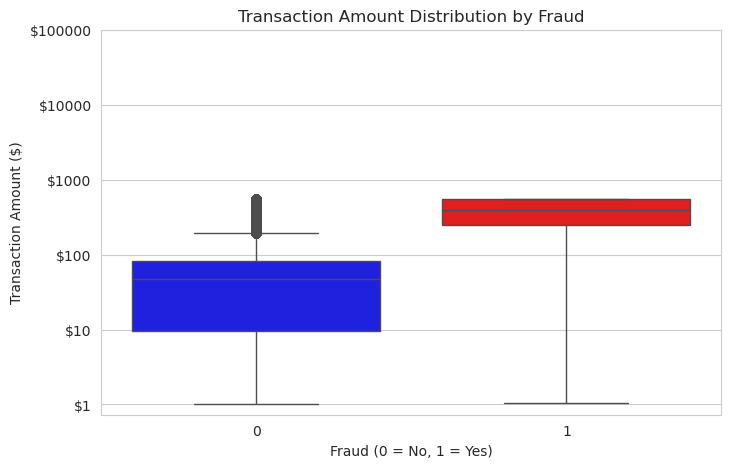

In [81]:
plt.figure(figsize=(8,5))

# Use log-transformed y-axis, show outliers, and adjust colors
sns.boxplot(
    x='is_fraud', 
    y=df['amt'].clip(upper=df['amt'].quantile(0.99)),  # Clip extreme values
    data=df, 
    showfliers=True,  # See outliers
    palette={'0': 'blue', '1': 'red'}
)

plt.title("Transaction Amount Distribution by Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount ($)")
plt.yscale('log')  

# Improve log-scale readability
y_ticks = [1, 10, 100, 1000, 10000, 100000]  # Set readable y-axis ticks
plt.yticks(y_ticks, [f"${ytick}" for ytick in y_ticks])

plt.show()

## Based on merchant

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4952\61606519.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_4952\61606519.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


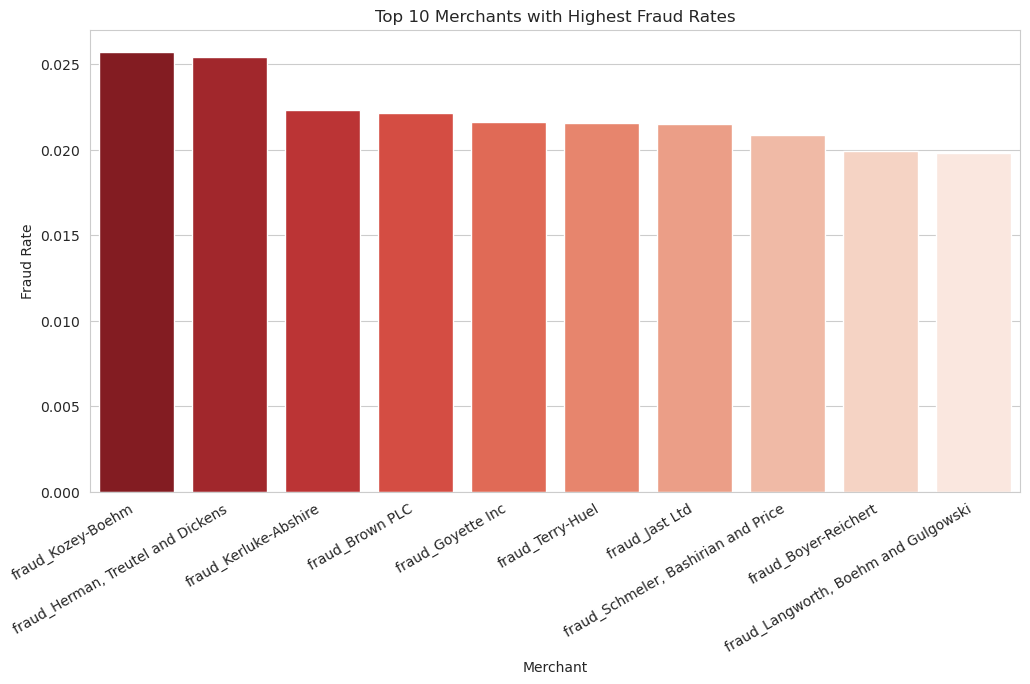

In [72]:
# Group by merchants to calculate fraud metrics
merchant_fraud = df.groupby('merchant').agg(
    total_fraud=('is_fraud', 'sum'),
    total_txns=('merchant', 'count'),
    fraud_rate=('is_fraud', 'mean')
).reset_index()

# Sort merchants by fraud rate and get the top 10
top_fraud_merchants = merchant_fraud.sort_values(by='fraud_rate', ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(
    x='merchant', 
    y='fraud_rate', 
    data=top_fraud_merchants, 
    palette='Reds_r',  # Using a gradient color
    ax=ax
)

# Rotate merchant names for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_title("Top 10 Merchants with Highest Fraud Rates")
ax.set_xlabel("Merchant")
ax.set_ylabel("Fraud Rate")

# Highlight high-risk merchants with fraud rate > 2.5%
high_risk_threshold = 0.025
for index, row in top_fraud_merchants.iterrows():
    ax.annotate(f"{int(row['total_fraud'])} frauds", 
                (index, row['fraud_rate'] + 0.002), 
                ha='center', fontsize=10, color='black')
    
    if row['fraud_rate'] > high_risk_threshold:
        ax.annotate('⚠️', (index, row['fraud_rate'] + 0.005), ha='center', fontsize=12)

# Show plot
plt.show()

In [38]:
# Calculating fraud rate per merchant
merchant_fraud_stats = df.groupby('merchant').agg(
    total_fraud=('is_fraud', 'sum'),
    total_txns=('merchant', 'count'),
    fraud_rate=('is_fraud', 'mean')
).reset_index()

# Define a high-risk fraud threshold 
fraud_threshold = 0.020  # Adjust as needed
high_risk_merchants = merchant_fraud_stats[merchant_fraud_stats['fraud_rate'] > fraud_threshold]['merchant']

# Flag transactions from high-risk merchants
df['high_risk_merchant'] = df['merchant'].isin(high_risk_merchants).astype(int)

# Print summary
print(f" Number of High-Risk Merchants: {len(high_risk_merchants)}")
df.head()

 Number of High-Risk Merchants: 8


,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,...,risk_hour_flag,lat_rad,long_rad,merch_lat_rad,merch_long_rad,distance_from_user,prev_lat,prev_long,distance_from_last_trans,high_risk_merchant
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,...,1,0.629694,-1.416825,0.628516,-1.432013,78.597568,NaN,NaN,0.0,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,...,1,0.853253,-2.063162,0.857987,-2.062743,30.212176,NaN,NaN,0.0,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,...,1,0.736194,-1.959342,0.753122,-1.957465,108.206083,NaN,NaN,0.0,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,...,1,0.806876,-1.956755,0.820904,-1.964561,95.673231,NaN,NaN,0.0,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,...,1,0.670568,-1.386889,0.675006,-1.372395,77.556744,NaN,NaN,0.0,0


## Based on Category

In [44]:
# Filter only fraud transactions
fraud_df = df[df['is_fraud'] == 1]

# Count fraud cases per category
fraud_counts = fraud_df['category'].value_counts().reset_index()
fraud_counts.columns = ['category', 'fraud_count']  # Rename columns

# Sort categories by fraud count
fraud_counts = fraud_counts.sort_values(by='fraud_count', ascending=False)

colors = sns.color_palette("Reds_r", len(fraud_counts))  # Reverse Reds palette

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29100\1163094969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


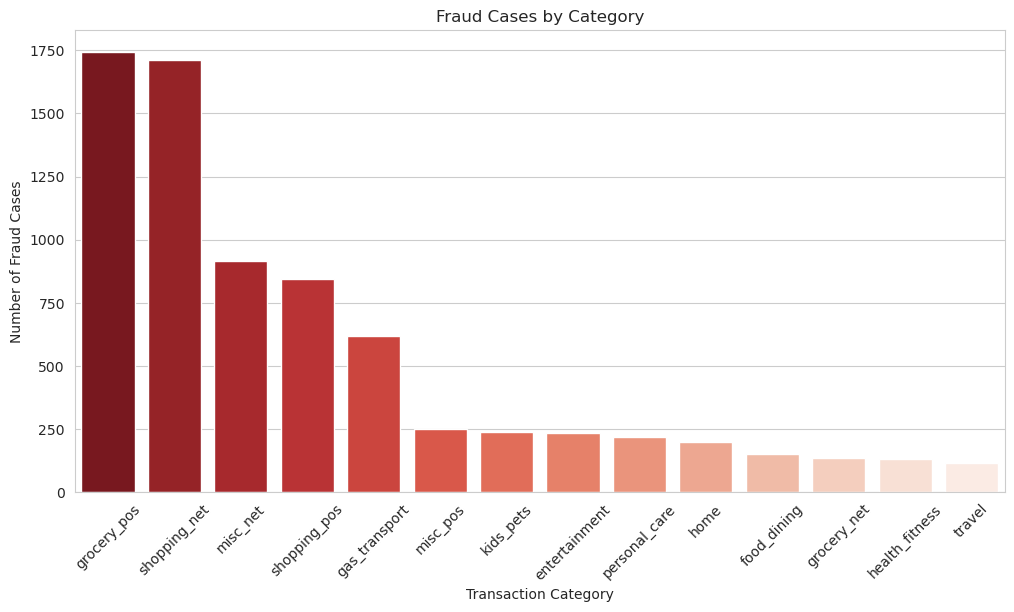

In [46]:
# Plot fraud transaction counts
plt.figure(figsize=(12, 6))
sns.barplot(
    x='category', 
    y='fraud_count', 
    data=fraud_counts, 
    palette=colors  # Apply gradient correctly
)

# Labels and title
plt.xlabel("Transaction Category")
plt.ylabel("Number of Fraud Cases")
plt.title("Fraud Cases by Category")

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [48]:
# Identify the most fraudulent category
most_fraudulent_category = fraud_counts.iloc[0]['category']  # Top category with highest fraud count

# Flag transactions in the most fraudulent category
df['most_fraudulent_category'] = (df['category'] == most_fraudulent_category).astype(int)

# Print the most fraudulent category
print(f"🚨 Most Fraudulent Category: {most_fraudulent_category}")
df.head()

🚨 Most Fraudulent Category: grocery_pos


,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,...,lat_rad,long_rad,merch_lat_rad,merch_long_rad,distance_from_user,prev_lat,prev_long,distance_from_last_trans,high_risk_merchant,most_fraudulent_category
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,...,0.629694,-1.416825,0.628516,-1.432013,78.597568,NaN,NaN,0.0,0,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,...,0.853253,-2.063162,0.857987,-2.062743,30.212176,NaN,NaN,0.0,0,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,...,0.736194,-1.959342,0.753122,-1.957465,108.206083,NaN,NaN,0.0,0,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,...,0.806876,-1.956755,0.820904,-1.964561,95.673231,NaN,NaN,0.0,0,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,...,0.670568,-1.386889,0.675006,-1.372395,77.556744,NaN,NaN,0.0,0,0


## Transaction Time per Second

In [50]:
df['transaction_time_seconds'] = (
    df['transaction_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second))

#tambahin perbandingan antara fraud dan non fraud

## Checking Amount of money is Outlier or not

In [56]:
from sklearn.ensemble import IsolationForest

#add feature amount is outlier
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Amt_is_outlier'] = iso_forest.fit_predict(df[['amt', 'transaction_time_seconds']])
df['Amt_is_outlier'] = df['Amt_is_outlier'].map({1: 0, -1: 1})  

In [81]:
df['Amt_is_outlier'].value_counts()

Amt_is_outlier
0    1283710
1      12965
Name: count, dtype: int64

In [82]:
pd.set_option('display.max_columns', None)
df

,trans_date_trans_time,merchant,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,trans_time,transaction_time,year,month,day,day_of_week,hour,age,Age Group Encoded,high_risk_merchant,lat_rad,long_rad,merch_lat_rad,merch_long_rad,most_fraudulent_category,transaction_time_seconds,Amt_is_outlier
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,00:00:18,00:00:18,2019,1,1,1,0,30,2,0,0.629694,-1.416825,0.628516,-1.432013,0,18,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44,00:00:44,2019,1,1,1,0,40,1,0,0.853253,-2.063162,0.857987,-2.062743,1,44,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,00:00:51,00:00:51,2019,1,1,1,0,56,1,0,0.736194,-1.959342,0.753122,-1.957465,0,51,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,00:01:16,00:01:16,2019,1,1,1,0,52,1,0,0.806876,-1.956755,0.820904,-1.964561,0,76,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,00:03:06,00:03:06,2019,1,1,1,0,32,2,0,0.670568,-1.386889,0.675006,-1.372395,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020-06-21,12:12:08,12:12:08,2020,6,21,6,12,58,1,0,0.658295,-1.963106,0.643001,-1.949372,0,43928,0
1296671,2020-06-21 12:12:19,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020-06-21,12:12:19,12:12:19,2020,6,21,6,12,40,1,0,0.685333,-1.352806,0.679053,-1.365660,0,43939,0
1296672,2020-06-21 12:12:32,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020-06-21,12:12:32,12:12:32,2020,6,21,6,12,52,1,0,0.574904,-1.846888,0.586771,-1.834874,0,43952,0
1296673,2020-06-21 12:13:36,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020-06-21,12:13:36,12:13:36,2020,6,21,6,12,39,2,0,0.756646,-1.789680,0.746808,-1.801898,0,44016,0


In [57]:
df_matrix = df[['is_fraud','risk_hour_flag', 
                'Age Group Encoded',  'transaction_time_seconds', 'Amt_is_outlier', 'high_risk_merchant'
               , 'most_fraudulent_category', 'amt']]

In [58]:
df_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   is_fraud                  1296675 non-null  int64  
 1   risk_hour_flag            1296675 non-null  int64  
 2   Age Group Encoded         1296675 non-null  int32  
 3   transaction_time_seconds  1296675 non-null  int64  
 4   Amt_is_outlier            1296675 non-null  int64  
 5   high_risk_merchant        1296675 non-null  int32  
 6   most_fraudulent_category  1296675 non-null  int32  
 7   amt                       1296675 non-null  float64
dtypes: float64(1), int32(3), int64(4)
memory usage: 64.3 MB


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_matrix.corr()

# Display correlation matrix
print(corr_matrix)

                          is_fraud  risk_hour_flag  Age Group Encoded  \
is_fraud                  1.000000        0.093547          -0.010631   
risk_hour_flag            0.093547        1.000000          -0.065811   
Age Group Encoded        -0.010631       -0.065811           1.000000   
transaction_time_seconds  0.013832       -0.327625           0.155759   
Amt_is_outlier            0.364562        0.039099           0.000436   
high_risk_merchant        0.023057        0.011350           0.004246   
most_fraudulent_category  0.035558        0.142045          -0.011677   
amt                       0.219404        0.034952           0.012125   

                          transaction_time_seconds  Amt_is_outlier  \
is_fraud                                  0.013832        0.364562   
risk_hour_flag                           -0.327625        0.039099   
Age Group Encoded                         0.155759        0.000436   
transaction_time_seconds                  1.000000        0.03

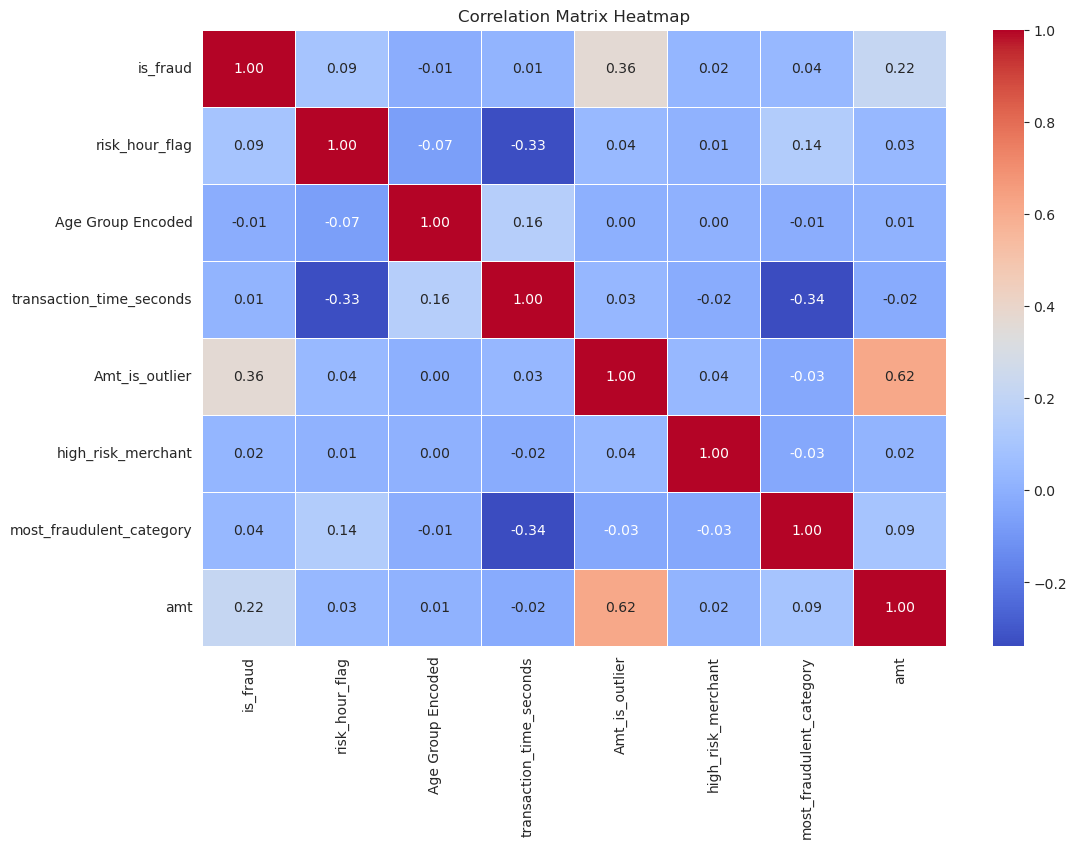

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# MODELING 

## ADABOOST *Best Model

In [309]:
df_Modeling = df_matrix

In [311]:
df_Modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   is_fraud                  1296675 non-null  int64  
 1   risk_hour_flag            1296675 non-null  int64  
 2   Age Group Encoded         1296675 non-null  int32  
 3   transaction_time_seconds  1296675 non-null  int64  
 4   Amt_is_outlier            1296675 non-null  int64  
 5   high_risk_merchant        1296675 non-null  int32  
 6   most_fraudulent_category  1296675 non-null  int32  
 7   amt                       1296675 non-null  float64
dtypes: float64(1), int32(3), int64(4)
memory usage: 64.3 MB


Handling Imbalance with SMOTE

In [313]:
df_Modeling = df_Modeling.astype('float32')

In [315]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Define Features and Target
X = df_Modeling.drop(columns=['is_fraud'])  
y = df_Modeling['is_fraud']

In [317]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from skopt import BayesSearchCV

# Step 1: Train-Test Split (Before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE to Training Data
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Split Resampled Train Data into Train + Validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
from skopt import BayesSearchCV

# Define AdaBoost Model
model = AdaBoostClassifier(random_state=42)

In [319]:
# Define Search Space (No 'clf')
search_space = {
    'n_estimators': (30, 300),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Bayesian Optimization
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=30,
    cv=3,
    n_jobs=4,
    random_state=42,
    scoring='f1')

In [321]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))
print("Final Train:", Counter(y_train_final))
print("Validation:", Counter(y_val))

Before SMOTE: Counter({0.0: 1031335, 1.0: 6005})
After SMOTE: Counter({0.0: 1031335, 1.0: 103133})
Final Train: Counter({0.0: 825068, 1.0: 82506})
Validation: Counter({0.0: 206267, 1.0: 20627})


In [330]:
# Define AdaBoost with a DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define hyperparameter search space
param_space = {
    "n_estimators": (10, 200),  # Number of weak learners
    "learning_rate": 
    (0.01, 2.0, "log-uniform"),  # Learning rate in log scale
}

# Use Bayesian Optimization with Cross-Validation
opt = BayesSearchCV(
    AdaBoostClassifier(estimator=base_estimator, random_state=42),
    param_space,
    n_iter=20,  # Number of optimization steps
    cv=3,  # 3-fold cross-validation
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

# Fit the optimizer on the undersampled training set
opt.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best Parameters: {opt.best_params_}")

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: OrderedDict({'learning_rate': 1.5797323314808558, 'n_estimators': 143})


In [331]:
# Extract best hyperparameters
best_params = opt.best_params_

# Define the best AdaBoost model using optimized parameters
best_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    random_state=42
)

# Fit the best model on the full training data
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Evaluate on the test set (optional)
y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Accuracy: 0.9819387026541028
Test Accuracy: 0.9932095552085141


Confusion Matrix:
 [[205294    973]
 [  3125  17502]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    206267
         1.0       0.95      0.85      0.90     20627

    accuracy                           0.98    226894
   macro avg       0.97      0.92      0.94    226894
weighted avg       0.98      0.98      0.98    226894

F1 Score: 0.8952
Precision: 0.9473
Recall: 0.8485


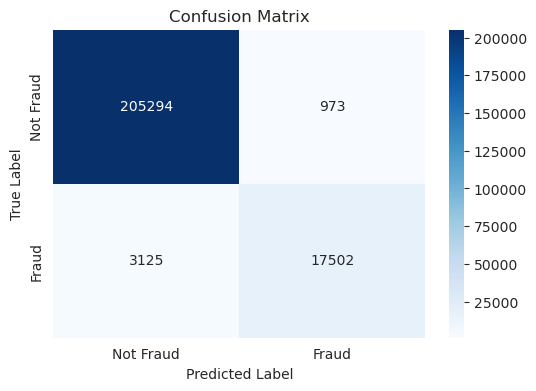

In [332]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on Validation Set
y_val_pred = best_model.predict(X_val)

# Compute Metrics
conf_matrix = confusion_matrix(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

# Print Results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [348]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Define a function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute VIF (Exclude target variable)
X_features = X_train.copy()  # Use training set features
vif_result = calculate_vif(X_features)

# Display VIF scores
print(vif_result)

                    Feature       VIF
0            risk_hour_flag  1.266509
1         Age Group Encoded  2.347834
2  transaction_time_seconds  2.361717
3            Amt_is_outlier  1.685627
4        high_risk_merchant  1.011634
5  most_fraudulent_category  1.160518
6                       amt  1.983354


Handling Imbalanced with UnderSampling

In [269]:
# Step 1: Define Features and Target
X = df_Modeling.drop(columns=['is_fraud'])  
y = df_Modeling['is_fraud']

In [287]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Split into train (70%), temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Before Undersampling: {Counter(y_train)}")  # Check class distribution

Before Undersampling: Counter({0: 902418, 1: 5254})


In [289]:
from imblearn.under_sampling import RandomUnderSampler

# Define undersampling strategy
rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # 1.0 means equal class balance

# Apply undersampling to training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print(f"After Undersampling: {Counter(y_train_resampled)}")  # Check new class distribution

# Define AdaBoost Model
model = AdaBoostClassifier(random_state=42)

After Undersampling: Counter({0: 5254, 1: 5254})


In [291]:
# Define AdaBoost with a DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define hyperparameter search space
param_space = {
    "n_estimators": (10, 200),  # Number of weak learners
    "learning_rate": (0.01, 2.0, "log-uniform"),  # Learning rate in log scale
}

# Use Bayesian Optimization with Cross-Validation
opt = BayesSearchCV(
    AdaBoostClassifier(estimator=base_estimator, random_state=42),
    param_space,
    n_iter=20,  # Number of optimization steps
    cv=3,  # 3-fold cross-validation
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

# Fit the optimizer on the undersampled training set
opt.fit(X_train_resampled, y_train_resampled)

# Best parameters found
print(f"Best Parameters: {opt.best_params_}")

Best Parameters: OrderedDict({'learning_rate': 0.7401973698296331, 'n_estimators': 43})


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [293]:
# Extract best hyperparameters
best_params = opt.best_params_

# Define the best AdaBoost model using optimized parameters
best_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=best_params["n_estimators"],
    learning_rate=best_params["learning_rate"],
    random_state=42
)

# Fit the best model on the full training data
best_model.fit(X_train_resampled, y_train_resampled)

# Evaluate on the validation set
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

# Evaluate on the test set (optional)
y_test_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Validation Accuracy: 0.8295998478156925
Test Accuracy: 0.8275853204594297


Confusion Matrix:
 [[160385  32990]
 [   153    973]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    193375
           1       0.03      0.86      0.06      1126

    accuracy                           0.83    194501
   macro avg       0.51      0.85      0.48    194501
weighted avg       0.99      0.83      0.90    194501

F1 Score: 0.0555
Precision: 0.0286
Recall: 0.8641


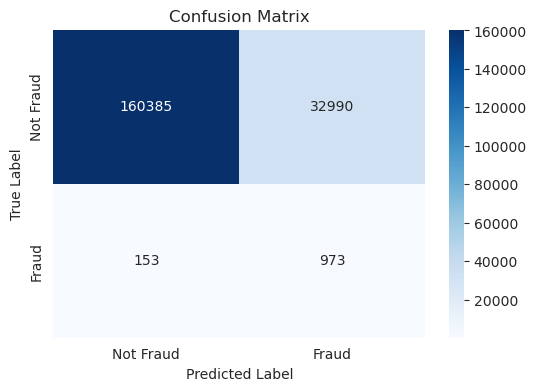

In [299]:
# Predictions on Validation Set
y_val_pred = best_model.predict(X_val)

# Compute Metrics
conf_matrix = confusion_matrix(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

# Print Results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Conclussion: Handling imbalance with SMOTE is better than undersampling

## RandomForest

In [337]:
df_Modeling = df_matrix

In [339]:
# Step 1: Define Features and Target
X = df_Modeling.drop(columns=['is_fraud'])  
y = df_Modeling['is_fraud']

In [344]:
# Step 1: Train-Test Split (Before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE to Training Data
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Split Resampled Train Data into Train + Validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42)

In [354]:
#hyperparameter search space
param_space = {
    "n_estimators": (50, 300),  # Number of trees
    "max_depth": (5, 50),  # Depth of trees
    "min_samples_split": (2, 20),  # Min samples to split
    "min_samples_leaf": (1, 10),  # Min samples per leaf
}

# Bayesian Optimization with 3-Fold Cross Validation
opt = BayesSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_space,
    n_iter=20,  # Number of iterations
    cv=3,  # 3-fold CV
    scoring="f1",  # Optimize for F1-score
    random_state=42,
    n_jobs=-1
)

# Fit optimizer on training data
opt.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {opt.best_params_}")

Best Parameters: OrderedDict({'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 299})


In [355]:
# Train model with best parameters
best_rf = RandomForestClassifier(**opt.best_params_, random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)

# Predictions on Validation Set
y_val_pred = best_rf.predict(X_val)

Confusion Matrix:
 [[206190     77]
 [  7180  13447]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    206267
           1       0.99      0.65      0.79     20627

    accuracy                           0.97    226894
   macro avg       0.98      0.83      0.89    226894
weighted avg       0.97      0.97      0.96    226894

F1 Score: 0.7875
Precision: 0.9943
Recall: 0.6519


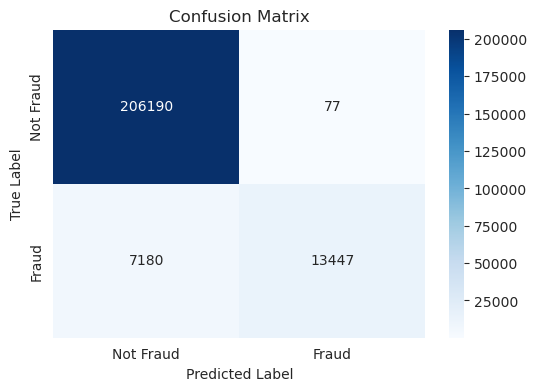

In [356]:
# Compute Confusion Matrix and Scores
conf_matrix = confusion_matrix(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

# Print Scores
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Logistic Regresssion

In [102]:
df_Modeling = df_matrix

In [104]:
# Step 1: Define Features and Target
X = df_Modeling.drop(columns=['is_fraud'])  
y = df_Modeling['is_fraud']

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Step 1: Train-Test Split (Before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 2: Apply SMOTE to Training Data
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Split Resampled Train Data into Train + Validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.2, stratify=y_train_resampled, random_state=42
)

# Step 4: Apply Standard Scaling AFTER SMOTE and Splitting
scaler = StandardScaler()
X_train_final_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)  # Scale test set as well

In [116]:
#hyperparameter search space
param_space = {
    "n_estimators": (50, 300),  # Number of trees
    "max_depth": (5, 50),  # Depth of trees
    "min_samples_split": (2, 20),  # Min samples to split
    "min_samples_leaf": (1, 10),  # Min samples per leaf
}

# Bayesian Optimization with 3-Fold Cross Validation
opt = BayesSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_space,
    n_iter=20,  # Number of iterations
    cv=3,  # 3-fold CV
    scoring="f1",  # Optimize for F1-score
    random_state=42,
    n_jobs=-1
)

# Fit optimizer on training data
opt.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {opt.best_params_}")

Best Parameters: OrderedDict({'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 268})


In [121]:
from sklearn.linear_model import LogisticRegression

# Define only valid hyperparameters for Logistic Regression
best_params_lr = {k: v for k, v in opt.best_params_.items() if k in ["C", "penalty"]}

# Train Logistic Regression model with best parameters
best_lr = LogisticRegression(**best_params_lr, random_state=42)
best_lr.fit(X_train_final_scaled, y_train_final)

# Predictions on Validation Set
y_val_pred = best_lr.predict(X_val_scaled)

Confusion Matrix:
 [[205182   1085]
 [  8940  11687]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98    206267
           1       0.92      0.57      0.70     20627

    accuracy                           0.96    226894
   macro avg       0.94      0.78      0.84    226894
weighted avg       0.95      0.96      0.95    226894

F1 Score: 0.6998
Precision: 0.9150
Recall: 0.5666


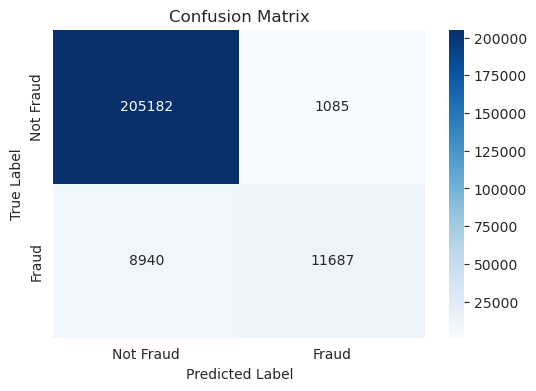

In [127]:
# Compute Confusion Matrix and Scores
conf_matrix = confusion_matrix(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)

# Print Scores
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()